<h1> Vamos dar um passada pelas técnicas de regressão </h1>

<h2> 1. Regressão Linear Unidimensional <h2>

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np 

In [6]:
# variaçao diária do dolar comercial até maio de 2019 
dolar = np.array([3.904,3.794,3.75,3.784,3.789,3.818,3.846,3.807,3.811,3.841,3.868,3.897,
    3.838,3.774,3.75,3.729,3.748,3.739,3.735,3.753,3.727,3.707,3.734,3.704,3.743,3.753,3.707,3.76,3.734,3.706,
    3.701,3.663,3.671,3.66,3.651,3.723,3.724,3.764,3.763,3.77,3.767,3.797,3.76,3.757,3.742,3.729,3.729,3.696,
    3.715,3.719,3.685,3.71,3.729,3.714,3.756,3.815,3.875,3.898,3.919,3.891,3.851,3.874,3.901,3.895,3.903,
    3.877,3.85,3.916,3.923,3.882,3.889,3.869,3.86,3.829,3.858,3.853,3.841,3.887,3.904,3.816,3.805,3.785,3.759,
    3.763,3.736,3.788,3.82,3.75,3.736,3.743,3.741,3.754,3.719,3.688,3.709,3.695,3.709,3.648,3.7,3.734,3.698,
    3.69,3.709,3.709,3.682,3.72,3.736,3.77,3.758,3.71,3.761,3.865,3.891,3.898,3.94,4.02,4.043,3.987,4.025,
    4.083,4.082,4.04,4.076,4.125,4.131,4.12,4.165,4.198,4.147,4.16,4.095,4.115,4.132,4.155,4.149,4.068,
    4.16,4.118,4.144,4.085,4.104,4.115,4.058,4.023,3.958,3.919,3.902,3.901,3.866,3.901,3.858,3.8,3.77,
    3.763,3.729,3.705,3.757,3.754,3.754,3.728,3.713,3.741,3.706,3.744,3.786,3.781,3.866,3.833,3.841,3.861,
    3.852,3.885,3.88,3.798,3.869,3.906,3.933,3.912,3.893,3.911,3.875,3.862,3.852,3.796,3.782,3.776,3.768,
    3.777,3.743,3.748,3.722,3.797,3.717,3.716,3.719,3.717,3.92,3.818,3.811,3.74,3.764,3.74])

In [7]:
dias  = np.arange(len(dolar))

In [8]:
#dolar

In [9]:
#dias

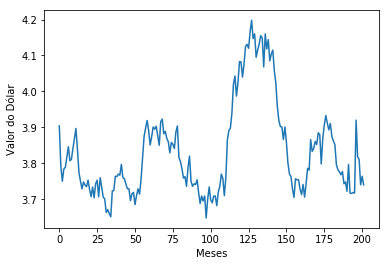

In [10]:
plt.xlabel("Meses")
plt.ylabel("Valor do Dólar")
plt.plot(dias,dolar)
plt.show()

In [13]:
def regressaoLinear(x,y):
    n = len(x)
    if n != len(y): raise Exception("Impossivel. Tamanhos diferentes ")
    mediaX,mediaY = sum(x)/n,sum(y)/n
    somas1 = sum([i*j for i,j in zip(x,y)])
    somas2 = sum([i**2 for i in x])
    sxy = somas1 - n * mediaX * mediaY
    sxx = somas2 - n * mediaX**2
    a = sxy / sxx
    b = mediaY - a * mediaX
    return a,b

In [12]:
a,b = regressaoLinear(dias,dolar)

In [13]:
y = a * dias + b

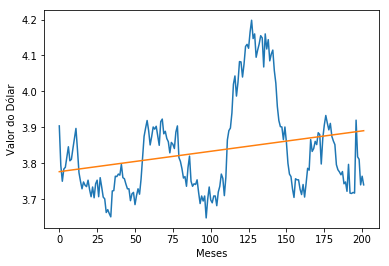

In [14]:
plt.xlabel("Meses")
plt.ylabel("Valor do Dólar")
plt.plot(dias,dolar)
plt.plot(dias,y)
plt.show()

<h3> fácil igual a tirar doce de bebê, mas  pode ser ainda mais fácil </h3>

<h2> Usando o sklearn </h2>

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(dias.reshape(-1,1), dolar.reshape(-1,1))

In [16]:
reg.score(dias.reshape(-1,1), dolar.reshape(-1,1))

0.063985885985928803

In [17]:
reg.coef_

array([[ 0.00056705]])

In [18]:
reg.intercept_ 

array([ 3.77667019])

In [19]:
z = reg.predict(dias.reshape(-1,1))

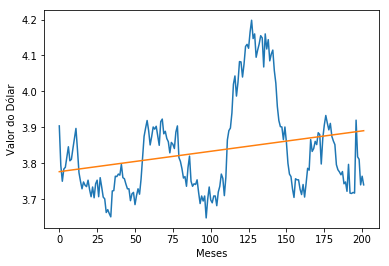

In [20]:
plt.xlabel("Meses")
plt.ylabel("Valor do Dólar")
plt.plot(dias,dolar)
plt.plot(dias,z)
plt.show()

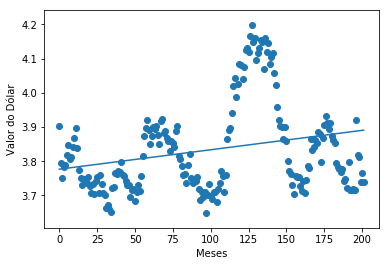

In [21]:
plt.xlabel("Meses")
plt.ylabel("Valor do Dólar")
plt.scatter(dias,dolar)
plt.plot(dias,z)
plt.show()

<h1> Agora vamos supor que o euro e o dolar juntos inluenciam a bolsa </h1>   

In [22]:
euro = np.array([4.3771,4.4072,4.4984,4.6086,4.4579,4.3572,4.3679,4.3668,4.312,4.3844,4.3576,4.3501,4.3286,
4.3968,4.381,4.4164,4.4043,4.4453,4.4627,4.5032,4.5327,4.535,4.5471,4.5847,4.6088,4.5444,4.5108,
4.504,4.5093,4.5212,4.5191,4.511,4.4803,4.5078,4.4256,4.4368,4.3767,4.3345,4.3407,4.333,4.3538,4.3959,
4.3741,4.3725,4.3146,4.3042,4.3053,4.3518,4.3985,4.3862,4.4435,4.4056,4.4351,4.4205,4.4943,4.5112,
4.5997,4.7242,4.7121,4.7493,4.751,4.8277,4.8383,4.8698,4.7961,4.797,4.8175,4.835,4.8197,4.7589,4.8274,
4.7968,4.8611,4.8814,4.8733,4.8373,4.8319,4.8151,4.7819,4.7803,4.8598,4.7706,4.6795,4.6545,4.6592,
4.5672,4.4424,4.4931,4.4515,4.3144,4.2936,4.3294,4.333,4.3286,4.2993,4.2711,4.2485,4.2693,4.232,   
4.2575,4.2211,4.2103,4.1862,4.1423,4.2068,4.2136,4.2142,4.2235,4.2812,4.3156,4.2757,4.2547,
4.2223,4.2569,4.2987,4.2805,4.2946,4.2857,4.3151,4.3456,4.3222,4.3893,4.3985,4.3568,4.3914,
4.3806,4.3423,4.365,4.3666,4.4639,4.4376,4.4613,4.4233,4.3906,4.4011,4.4109,4.4383,4.4328,
4.4471,4.4021,4.4104,4.431,4.4699,4.4974,4.439,4.439,4.3852,4.2868,4.2725,4.2518,4.257,4.2567,4.2499,
4.2612,4.2726,4.2447,4.2412,4.2805,4.2644,4.2863,4.2723,4.3176,4.3033,4.2833,4.3056,4.2703,4.2445,
4.1927,4.2121,4.2008,4.1951,4.2146,4.221,4.2163,4.2229,4.2133,4.2127,4.2668,4.1874,4.2201,4.2177,
4.2112,4.267,4.2453,4.2307,4.2712,4.2524,4.2578,4.3079,4.3317,4.3232,4.3462,4.318,4.3002,4.3278,
4.3333,4.3436,4.3214,4.2852,4.3024,4.3142,4.3807])

In [23]:
variacaoEuro = [(euro[i+1]-euro[i])/euro[i] for i in range(len(euro)-1)]

In [24]:
ibovespa= np.array([-3.1,-1.34,-1.55,-0.41,0.86,0.54,-0.3,1.1,-0.2,2.79,1.09,0.13,-0.41,-1.03,-1.77,-0.3,0.37,
-0.66,0.98,0.4,-1.14,1.19,-1.04,-0.5,1.97,-0.05,1.86,-0.98,1.31,-0.55,-3.74,-0.28,0.74,0.48,0.41,1.42,
0.2,-2.29,0,1.16,1.53,-0.94,-0.09,0.78,1.01,0.36,-0.44,0.87,-0.15,0.2,1.72,0.36,-0.15,0.32,0.59,3.56,
2.84,0.38,-0.65,0.5,-0.47,-1.08,0.24,-1.2,-0.44,0.99,0.65,0.59,-2.5,-0.82,-0.22,0.47,-1.33,0.3,-0.18,
0.51,1.55,2.74,-0.79,-1.43,0.24,-0.72,0,-0.69,2.96,1.25,-0.71,-0.14,0.02,-2.39,-1.07,-1.04,1.33,1.14,
0.62,3.69,-2.24,1.95,1.23,-2.62,-0.35,1.64,0.44,-2.24,0.05,2.83,0.53,-0.91,-2.8,-0.24,4.82,-0.76,-0.39,
2.06,3.78,-0.91,-0.82,1.71,0.03,0.83,-1.76,1.62,-0.07,-0.19,1.99,1.8,0.99,-0.58,0.63,-2.33,0.03,1.76,
0.51,-1.94,-0.63,0.36,-2.53,1.18,-0.59,2.19,0.83,-1.65,2.29,-1.5,0.39,-1.03,-0.34,-1.94,1.43,1.28,-2.86,
-0.48,-1.49,-0.87,-0.47,2.26,0.42,0.1,-1.31,0.51,0.58,-1.01,1.34,1.49,-0.73,1.4,0.16,-0.98,1.93,0.08,
0.97,1.96,-0.6,-0.22,0,0.61,-0.26,1.46,1.14,0.11,1.39,1.64,-1.11,0.64,0.44,0.81,-2.84,1.02,2.26,-1.33,
-0.93,-0.97,-0.87,0.62,-0.87,-1.23,-2.98,-0.68,-2.49,1.76,0.9,0.63])

In [25]:
doladez16 = 3.3830
dolarComercial1718=[3.2034,3.0799,3.1619, 3.1269, 3.1011, 3.2836, 3.1899, 3.1976, 3.1255,
                   3.1572, 3.2803, 3.3176, 3.1963, 3.2209, 3.2859, 3.4105, 3.6753, 3.7738, 
                   3.8745, 3.9134, 4.1879, 3.7332, 3.7924, 3.9090]

In [26]:
# Dataset 3
#índice de inflação brasileira entre junho de 2018 e maio de 2019
inflacao = [1.26, 0.33, -0.09, 0.48, 0.45, -0.21, 0.15, 0.32, 0.43, 0.75, 0.57, 0.13 ]

In [27]:
variacaoDolar = [(dolar[i+1]-dolar[i])/dolar[i] for i in range(len(dolar)-1)]

In [28]:
len(variacaoDolar)

201

In [29]:
len(ibovespa)

202

In [30]:
len(variacaoEuro)

201

<h2> Vamos dar uma olhadinha na correlação </h2>

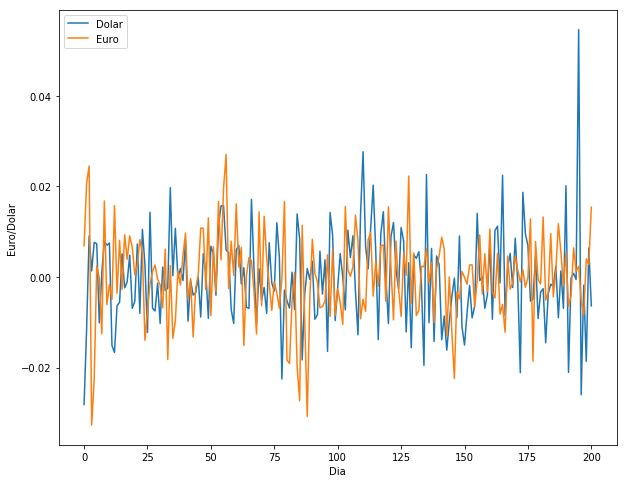

In [31]:
# dolar x euro
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xlabel('Dia')
ax.set_ylabel('Euro/Dolar')
x = [i for i in range(len(dolar)-1)]
ax.plot(x,variacaoDolar,label="Dolar")
ax.plot(x,variacaoEuro,label="Euro")
ax.legend()
plt.show()

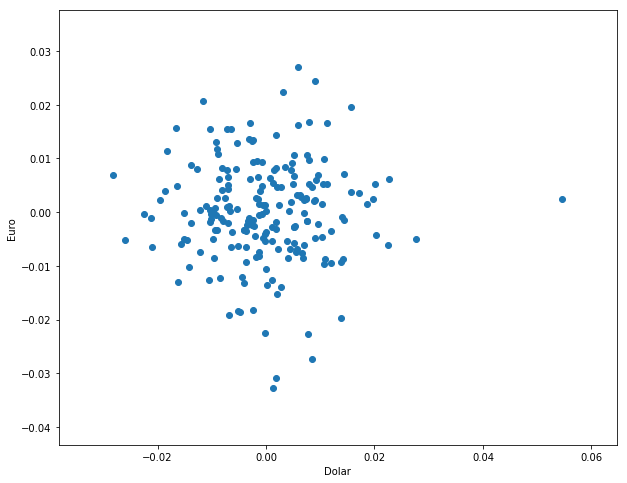

In [32]:
# dolar x euro
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xlabel('Dolar')
ax.set_ylabel('Euro')
ax.scatter(variacaoDolar,variacaoEuro)
plt.show()


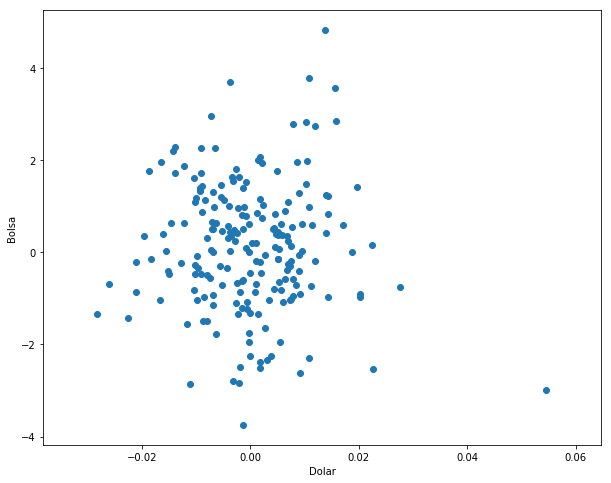

In [33]:
# dolar x euro
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xlabel("Dolar")
ax.set_ylabel("Bolsa")
ax.scatter(variacaoDolar,ibovespa[1:])
plt.show()


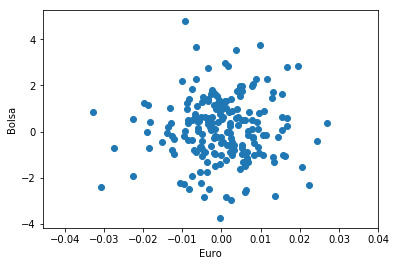

In [34]:
# dolar x euro
plt.xlabel("Euro")
plt.ylabel("Bolsa")
plt.scatter(variacaoEuro,ibovespa[1:])
plt.show()


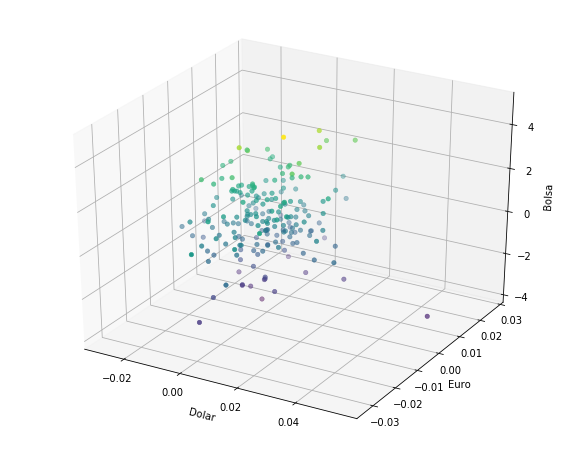

In [35]:
# tudo junto 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Dolar')
ax.set_ylabel('Euro')
ax.set_zlabel('Bolsa')

ax.scatter(variacaoDolar, variacaoEuro, ibovespa[1:], c=ibovespa[1:], cmap='viridis', linewidth=0.5)

plt.show()

<h3> Usando o Numpy </h3> 

In [36]:
Xnp = np.array([ (1, d, e) for d,e in zip(variacaoDolar,variacaoEuro)])

<h3> O 1 é adicionado a matriz para fazer o papel do b na equação da reta (hiperplano no caso) </h3>

In [37]:
Ynp = ibovespa[1:]

In [38]:
#calcula os pesos - RECEITA DE BOLO
wnp = np.linalg.solve(np.dot(Xnp.T,Xnp), np.dot(Xnp.T,Ynp))

In [39]:
wnp

array([ 0.12851777, -3.71733374,  4.95487299])

In [40]:
Znp = np.dot(Xnp,wnp)

In [41]:
# ajuste do hiperplano
d1 = Ynp - Znp
d2 = Ynp - Ynp.mean()
r2 = 1 - d1.dot(d1)/d2.dot(d2)

In [42]:
r2

0.001896985671164364

<h3> Usando o SKLEARN </h3>

In [43]:
Xsk = np.array([(i,j) for i,j in zip(variacaoDolar,variacaoEuro)])

In [44]:
Ysk = ibovespa[1:]

In [45]:
reg = LinearRegression().fit(Xsk.reshape(-1,2),Ysk.reshape(-1,1))

In [46]:
Zsk = reg.predict(Xsk.reshape(-1,2))

In [47]:
#Zsk

In [48]:
reg.score(Xsk.reshape(-1,2), Ysk.reshape(-1,1))

0.001896985671164253

In [49]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
reg.intercept_

array([ 0.12851777])

</h3> Não muito bom </h3>

<h1> Vamos Plotar </h1> 

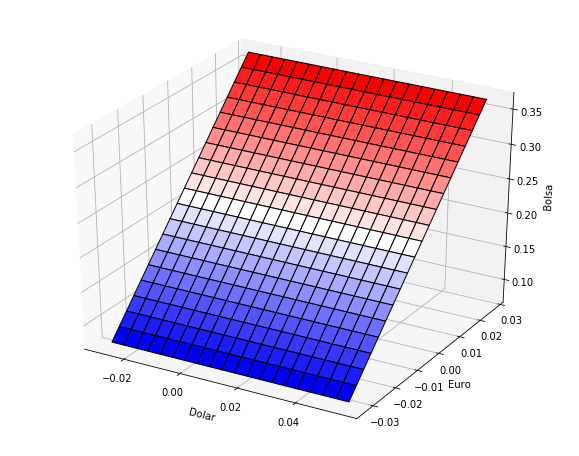

In [51]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Dolar')
ax.set_ylabel('Euro')
ax.set_zlabel('Bolsa')

dolarMin = min(variacaoDolar)
dolarMax = max(variacaoDolar)
euroMin = min(variacaoEuro)
euroMax = max(variacaoEuro)

faixaX = np.linspace(dolarMin, dolarMax, 20)
faixaY = np.linspace(euroMin, euroMax, 20)

entradasX, entradasY = np.meshgrid(faixaX,faixaY)

entrada = np.array([(i[0],j[0]) for i,j in zip(entradasX,entradasY)]).reshape(-1,2)

saidas = reg.predict(entrada)

ax.plot_surface(entradasX, entradasY, saidas.reshape(-1,1), 
                cmap='bwr', edgecolor='black') #rstride=1, cstride=1

plt.show()


<h3> Não foi nosso dia de sorte </h3>

In [52]:
# que tal algo mais simples como Z = X * X * X - 3 * X * Y * Y (sela do macaco)
# ver http://www.mat.ufpb.br/vetorial/graf.htm
#
xrnd = np.linspace(-20,20,40)
yrnd = np.linspace(-20,20,40)
X,Y = np.meshgrid(xrnd,yrnd)
# Z = X * X + Y * Y                singularidade
# Z = np.sqrt(X * X + Y * Y  -1)   idem
Z = X * X * X - 3 * X * Y * Y

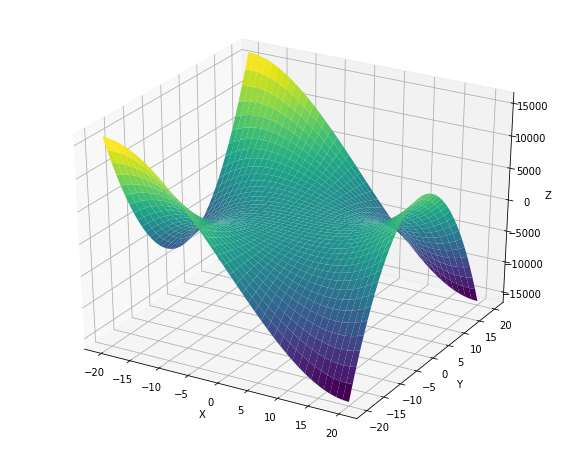

In [53]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')

plt.show()

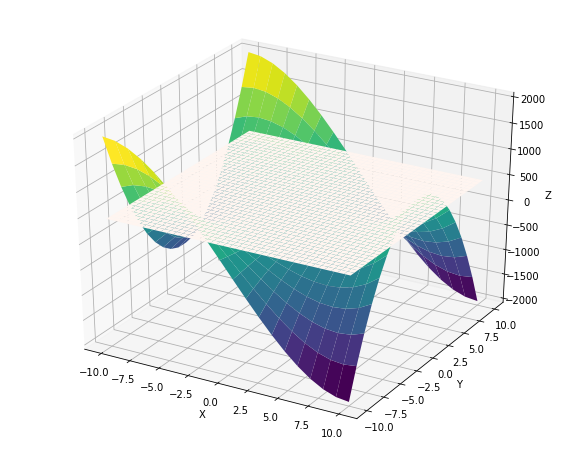

In [54]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

x = np.linspace(-10,10,20)
y = np.linspace(-10,10,20)
x,y = np.meshgrid(x,y)

zz =  x * x * x - 3 * x * y * y 

ax.plot_surface(x, y, zz, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')


x = x.reshape(-1,1)
y = y.reshape(-1,1)
zz =  x * x * x - 3 * x * y * y 

xyj = np.array([(1, d, e) for d,e in zip(x,y)])

ww = np.linalg.solve(np.dot(xyj.T,xyj), np.dot(xyj.T,zz))

x2 = np.linspace(-10,10,40)
y2 = np.linspace(-10,10,40)

xx2,yy2 = np.meshgrid(x2,y2)

x2y2 = np.array([(1,i[0],j[0]) for i,j in zip(xx2,yy2)]).reshape(-1,3)

z3 = np.dot(x2y2,ww)

ax.plot_surface(xx2, yy2, z3, 
                cmap='Reds', edgecolor='none') #rstride=1, cstride=1,

plt.show()


<H3> Quem dera a vida fosse simples assim </h3>

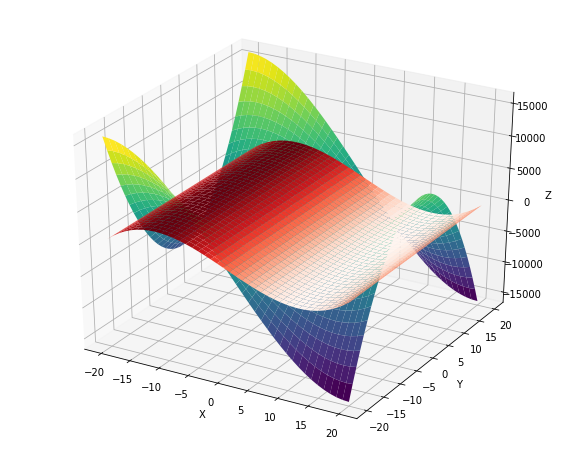

In [55]:
#
# não repassar esse (algum erro)
#

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-20,20,40)
y = np.linspace(-20,20,40)
X,Y = np.meshgrid(x,y)
Z = X * X * X - 3 * X * Y * Y

XY = np.array([(i[0],j[0]) for i,j in zip(X,Y)]).reshape(-1,2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')


reg2 = LinearRegression().fit(XY,Z)
 
X2,Y2 = np.meshgrid(np.linspace(-20,20,40),np.linspace(-20,20,40))
X2Y2 = np.array([(i[0],j[0]) for i,j in zip(X2,Y2)]).reshape(-1,2)

ZZ = reg2.predict(X2Y2)

ax.plot_surface(X2, Y2, ZZ,
                cmap='Reds', edgecolor='none')

plt.show()

In [56]:
#
# Estes dados levam a uma matriz singular onde estas equações não funcionam
#
a = np.linspace(0,10,10)
b = np.linspace(0,10,10)

A,B = np.meshgrid(a,b)

C = np.sqrt(A * A + B * B)

AB  = np.array([(1,i[0],j[0]) for i,j in zip(A,B)])

w = np.linalg.solve(np.dot(AB.T,AB), np.dot(AB.T,C))


LinAlgError: Singular matrix

<h3> Uma matriz é singular se e somente se seu determinante é nulo. Por exemplo, se uma matriz quadrada tiver pelo menos uma linha ou coluna nula, terá determinante zero (0), o que caracteriza uma matriz singular.
Uma matriz A, é singular se e somente se existir um vetor X, não nulo tal que:
A x = 0
Se uma matriz  é singular, então o problema Ax = B ou não possui solução ou possui infinitas soluções. </h3>

<h2> Solução: Gradiente Descendente </h2>
<h3> enfim, nem tanto .. </h3>

In [131]:
# seja a funcao f(x) = x ^ 2
def f(x):
    return x**2

#seja a sua derivada f linha) f'(x) = 2x
def flinha(x):
    return 2*x

# seja um número pequeno qualquer theta 
theta = 10



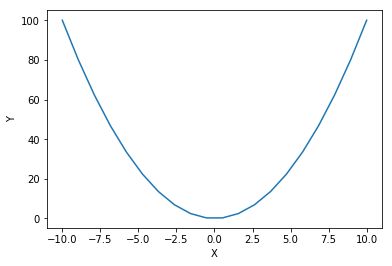

In [132]:
#dado um conjunto de valores eixo
eixox = np.linspace(-10,10,20)

#entao
eixoy = f(eixox)

# nao precisar fazer laco porque o numpy já se ocupou disso

plt.xlabel("X")
plt.ylabel("Y")
plt.plot(eixox,eixoy)
plt.show()


In [175]:
#encontrado o minimo numericamente.


def minimizar(f,flinha,x0,theta,maxit = 20, imprime = True):
    x = x0
    it = 0
    while it<maxit:
        if imprime:print("X : {:7.4f}  Y: {:7.4f} \
                         theta * dydx : {:7.4f}".format(x,f(x),theta * flinha(x)))
        dydx = flinha(x) 
        if dydx<0:
            x -= theta * flinha(x)
        else:
            x += theta * flinha(x)
        it+=1
        if f(x) < 1E-6:
            return True,it
    return False,it


In [176]:
#seja o ponto inicial -5.0 (chute)
minimizar(f,flinha,-5,0.4,1000)

X : -5.0000  Y: 25.0000                          theta * dydx : -4.0000
X : -1.0000  Y:  1.0000                          theta * dydx : -0.8000
X : -0.2000  Y:  0.0400                          theta * dydx : -0.1600
X : -0.0400  Y:  0.0016                          theta * dydx : -0.0320
X : -0.0080  Y:  0.0001                          theta * dydx : -0.0064
X : -0.0016  Y:  0.0000                          theta * dydx : -0.0013


(True, 6)

<h2> theta = taxa de aprendizagem. </h2>
<h3> O que acontece quando ela é muito alta ou muito baixa ? </h3>


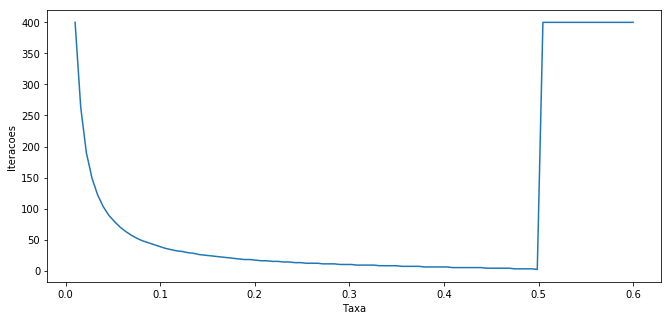

In [177]:
# estudo da taxa de aprendizagem
iteracoes = []
taxas = np.linspace(0.01,0.6,100)
for theta in taxas:
    sol,itr = minimizar(f,flinha,-5,theta,400,False)
    iteracoes.append(itr)
       
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(111)
ax.set_xlabel("Taxa")
ax.set_ylabel("Iterações")
plt.plot(taxas,iteracoes)
plt.show()



In [192]:
#minimizar(f,flinha,-5,10,50000,False)

(False, 50000)

In [201]:
#Ah, mas seu eu nao souber da derivada? Putz, nada mais fácil
# f '(x)  = lim (dx ->0) (f(x + dx) - f (x))/(dx)
# estime um dx minusculo e faça as contas
# ex. a derivada de x^2 no ponto 4
(f(5+0.0001) - f(5))/0.0001



10.000099999984968

<h3> Sem mais desculpas </h3>

In [418]:
# voltando para a nossa sela do macaco
x1 = np.random.randn(5)
x2 = np.random.randn(5)
X12 = np.array([(1,i,j) for i,j in zip(x1,x2)])
Y12 = x1**3 - 3 * x1 * x2 ** 2 

In [420]:
Y12

array([ 2.04921091,  3.52786276,  0.73764788,  0.28981714,  3.44093972])

In [421]:
W = np.random.randn(3)/np.sqrt(3)

In [422]:
W

array([ 0.83273471,  0.40460682, -0.30102468])

In [423]:
theta = 0.001

In [424]:
erros = []

In [425]:
for t in range(1000):
    NY12 = X12.dot(W)
    dif = NY12 - Y12
    grad = 2 * X12.T.dot(dif) # dy/dw faça as contas
    W = W - (theta * grad)
    erro = sum([i*i for i in dif])/len(dif) # erro quadratico medio
    erros.append(erro)

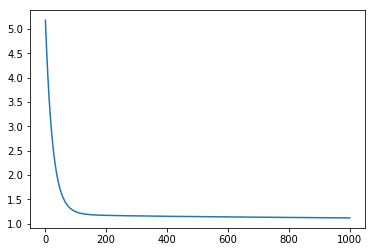

In [428]:
eixox=range(1,len(erros)+1)
plt.plot(eixox,erros)
plt.show()

</h1> Má notícia. Gradiente descendente só funciona com funções convexas, ...mas isso é outro curso. </h1>

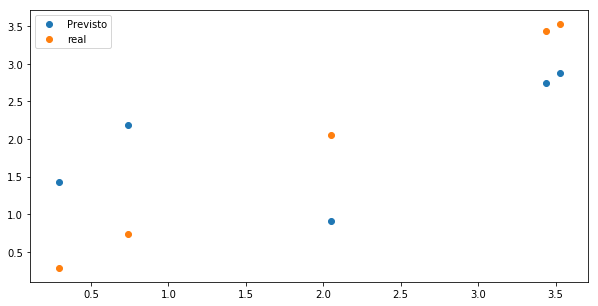

In [436]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
eixox=range(1,len(NY12)+1)
plt.scatter(Y12,NY12,label="Previsto")
plt.scatter(Y12,Y12,label="real")
ax.legend()
plt.show()

</h2> Vamos falar sobre Overfitting </h2>

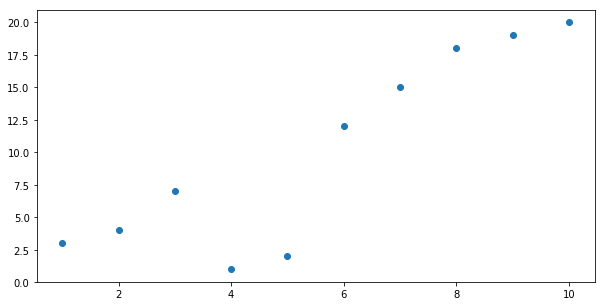

In [125]:
#Seja o conjunto de pontos
cx = np.array([1,2,3,4,5,6,7,8,9,10])
cy = np.array([3,4,7,1,2,12,15,18,19,20])

#VAMOS VER SE O MODELO GENERALIZA BEM.
#Criar dois conjuntos de pontos
#para construir o modelo (treinamento)

cxtr = cx[:7]
cytr = cy[:7]

#para testar o modelo : teste

cxte = cx[7:]
cyte = cy[7:]


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.scatter(cx,cy)
plt.show()

In [126]:
#Agora vamos fazer a regressão.
a,b = regressaoLinear(cxtr,cytr)

In [127]:
cy2 = a * cx + b

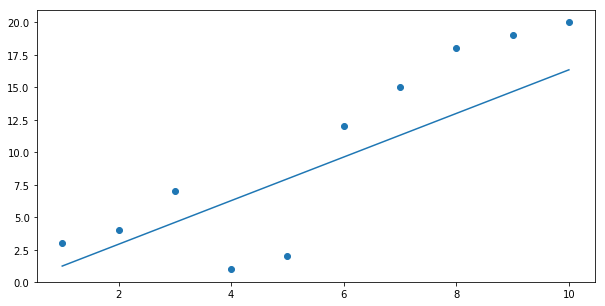

In [128]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.scatter(cx,cy)
plt.plot(cx,cy2)
plt.show()

In [129]:
# vamos pegar o erro medio da previsão
cyte2 = a * cxte + b

In [130]:
cyte2

array([ 13.        ,  14.67857143,  16.35714286])

In [131]:
# erro medio na generalizao
erro = sum([ (i-j)**2 for i,j in zip(cyte,cyte2) ])/len(cyte)

In [132]:
erro

18.981717687074838

In [133]:
# vamos remover alguns pontos
cxtr2 = cx[:3]
cytr2 = cy[:3]

In [134]:
cxtr2

array([1, 2, 3])

In [135]:
a2,b2 = regressaoLinear(cxtr2,cytr2)

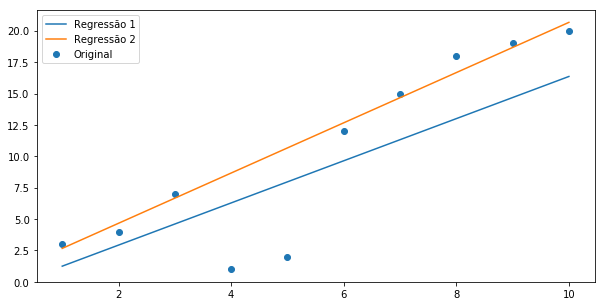

In [139]:
#agora vamos gerar uma nova reta com os dados antigos, mas coeficientes novos
c3 = a2 * cx + b2
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.scatter(cx,cy,label="Original")
plt.plot(cx,cy2,label="Regressão 1")
plt.plot(cx,c3,label="Regressão 2" )
ax.legend()
plt.show()

In [137]:
#Vamos  calcular o erro da regressao 2
erro2 = sum([ (i-j)**2 for i,j in zip(cy,c3) ])/len(cy)

In [138]:
erro2

13.744444444444451

</h3> Nossa segunda reta generaliza melhor que a primeira </h3>

</h2> Dizemos que a nossa primeira reta está superadaptada, sobreajustada ou em overfitting </h2>

<h2> Detalhe. Quase todos os experimentos de machine learning acabam assim.</h2> 

<h3> Soluções para o overfitting: Regularização. </h3>

In [141]:
# Voltando de novo para a nossa sela do macaco
# Lembre-se que no problema real a funçao Y real é desconhecida
#
x1 = np.random.randn(5)
x2 = np.random.randn(5)

# calculando X e Y
X12 = np.array([(1,i,j) for i,j in zip(x1,x2)])
Y12 = x1**3 - 3 * x1 * x2 ** 2 

# Pesos iniciais
W = np.random.randn(3)/np.sqrt(3)

#taxa de aprendizagem
theta = 0.001

erros = []

In [145]:
# loop do gradiente com Lasso
for t in range(1000):
    NY12 = X12.dot(W)
    dif = NY12 - Y12
    grad = 2 * X12.T.dot(dif) # dy/dw faça as contas
    #
    # introduzir a penalidade LASSO L1
    #
    L1 = 10*np.sign(W) # sign = nosso k, o sinal do w
    W = W - (theta * (grad + L1))
    erro = sum([i*i for i in dif])/len(dif) # erro quadratico medio
    erros.append(erro)

In [144]:
np.sign(1)

1

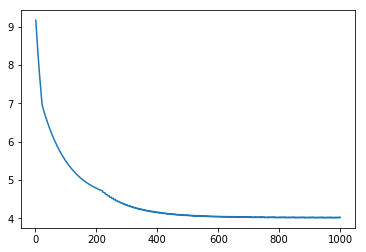

In [146]:
eixox=range(1,len(erros)+1)
plt.title("Evolucao do Erro Medio nas Iterações")
plt.plot(eixox,erros)
plt.show()

In [216]:
# loop do gradiente com Ridge
# np.eye = matriz identidade
erros = []
for l2 in range(-250,250,10): 
    w_l2 = np.linalg.solve(l2*np.eye(3) + X12.T.dot(X12),X12.T.dot(Y12) )
    NY12_l2 = X12.dot(w_l2)
    erro = 0
    for i,j in zip(Y12,NY12_l2):
        erro += (j-i)**2
    erros.append(erro)
    

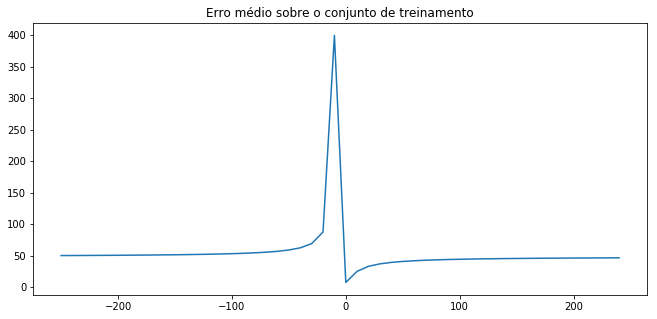

In [217]:
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(111)
plt.title("Erro médio sobre o conjunto de treinamento")
plt.plot(range(-250,250,10),erros)
plt.show()

In [218]:
erro = 0
for i,j in zip(Y12,NY12_l2):
    erro += (j-i)**2
    print("REAL :{}  PREDITO :{}".format(i,j) )
print("Erro medio = ",erro/len(Y12))

REAL :0.753228608113051  PREDITO :0.02891062870496877
REAL :-0.11741688250043711  PREDITO :0.04152212967069797
REAL :0.06405432226939756  PREDITO :-0.008427797226004854
REAL :-0.3929932416752847  PREDITO :0.043354905687355644
REAL :6.909935154423781  PREDITO :0.12956305739872526
Erro medio =  9.34379945647


<h2> Elastic fica por sua conta. </h2>

In [183]:
X12[:,[1]]

array([[ 1.51451672],
       [ 0.27901545],
       [ 0.76200865],
       [ 0.54376832],
       [-0.98278878]])

In [149]:
np.eye(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])